In [57]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [58]:
with open(f'dataframes/{11}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.760219e+09,1.760219e+09,"[79.16, 174.6, 174.53, 174.53, 174.83, 174.45,...",915,1,5
1,Tag2,Tag1,1.760219e+09,1.760219e+09,"[224.27, 251.05, 251.28, 250.9, 251.05, 251.28...",915,1,5


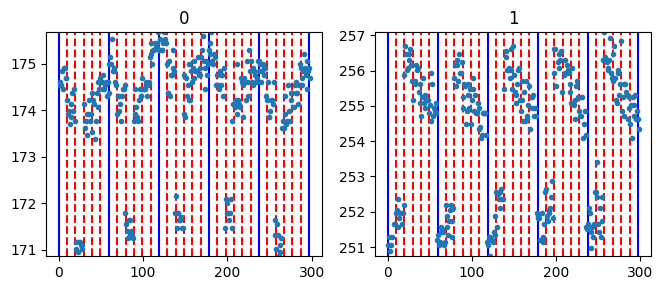

In [59]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(10,3))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.ylim([np.percentile(voltages,1), np.percentile(voltages,99)])
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [60]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[79.16, 174.6, 174.53, 174.53, 174.83, 174.45,...","[174.6, 174.87, 175.48000000000002, 175.21, 17...","[174.065, 174.3, 174.79000000000002, 174.64, 1...","[171.09, 171.4, 171.665, 171.78, 171.28]","[173.83499999999998, 174.14499999999998, 174.4...","[174.18, 174.53, 174.83, 174.6, 174.37]","[174.6, 175.325, 175.01999999999998, 174.79000...",915,1,5
1,Tag2,Tag1,"[224.27, 251.05, 251.28, 250.9, 251.05, 251.28...","[251.05, 251.27499999999998, 251.2, 251.735, 2...","[251.96, 251.815, 252.35, 252.07999999999998, ...","[256.235, 256.045, 256.04499999999996, 256.47,...","[255.7, 255.285, 255.55, 255.93, 255.74]","[255.17, 255.09, 254.94, 255.20999999999998, 2...","[254.9, 254.6, 254.94, 254.71, 254.9]",915,1,5
